In [1]:
#Participants
#Global X Japan Semiconductor ETF (2644 JP)
#CTBC Taiwan Leading Semiconductor ETF (00891 TW)

#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Read excel file
file_path = r'D:\Derivatives Trading\Japan Semi vs Taiwan Semi.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [3]:
# Calculate daily returns
returns = df.pct_change()

# Remove any NaN values
returns = returns.dropna()

# Calculate descriptive statistics
desc_stats = returns.describe()
print("\nDescriptive Statistics:")
print(desc_stats)

# Calculate correlation
correlation = returns.corr()
print("\nCorrelation Matrix:")
print(correlation)

# Calculate annualized volatility (assuming 252 trading days)
annualized_vol = returns.std() * np.sqrt(252)
print("\nAnnualized Volatility:")
print(annualized_vol)


Descriptive Statistics:
          2644 JP    00891 TW
count  776.000000  776.000000
mean     0.000679    0.000245
std      0.021561    0.015171
min     -0.162198   -0.088319
25%     -0.011771   -0.007389
50%      0.000951    0.000568
75%      0.013350    0.008672
max      0.108800    0.056956

Correlation Matrix:
           2644 JP  00891 TW
2644 JP   1.000000  0.216258
00891 TW  0.216258  1.000000

Annualized Volatility:
2644 JP     0.342276
00891 TW    0.240826
dtype: float64


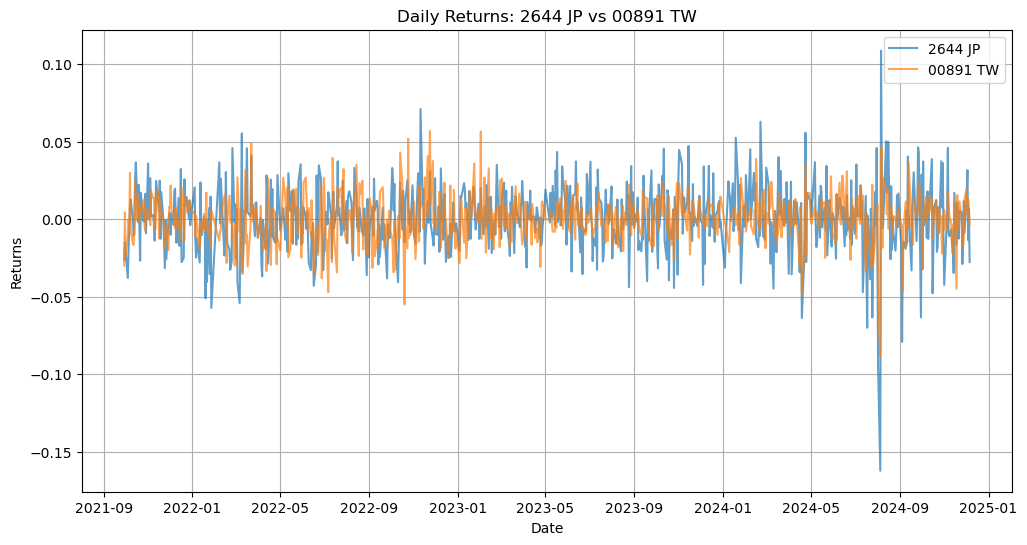

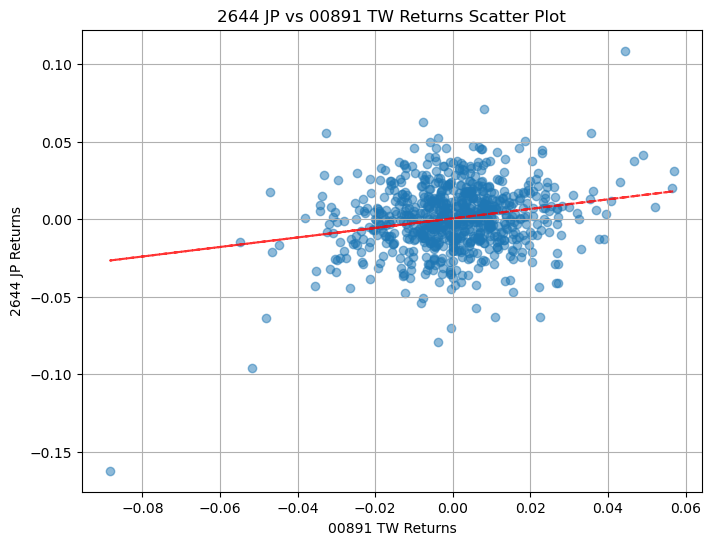

In [4]:
# Plot returns
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['2644 JP'], label='2644 JP', alpha=0.7)
plt.plot(returns.index, returns['00891 TW'], label='00891 TW', alpha=0.7)
plt.title('Daily Returns: 2644 JP vs 00891 TW')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(returns['00891 TW'], returns['2644 JP'], alpha=0.5)
plt.xlabel('00891 TW Returns')
plt.ylabel('2644 JP Returns')
plt.title('2644 JP vs 00891 TW Returns Scatter Plot')
plt.grid(True)

# Add regression line
z = np.polyfit(returns['00891 TW'], returns['2644 JP'], 1)
p = np.poly1d(z)
plt.plot(returns['00891 TW'], p(returns['00891 TW']), "r--", alpha=0.8)
plt.show()



Regression Results:
                            OLS Regression Results                            
Dep. Variable:                2644 JP   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     37.97
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.15e-09
Time:                        21:10:11   Log-Likelihood:                 1895.4
No. Observations:                 776   AIC:                            -3787.
Df Residuals:                     774   BIC:                            -3777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.00

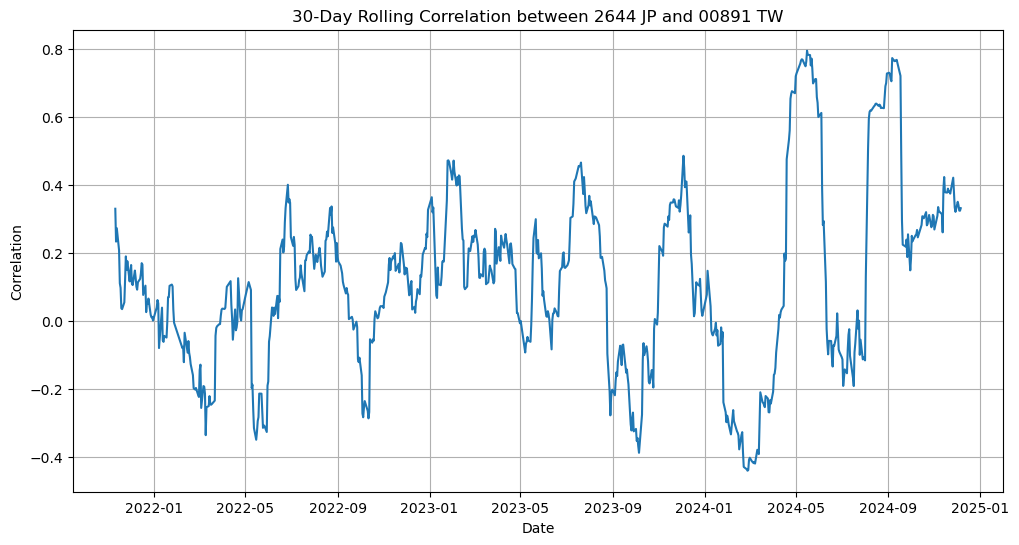

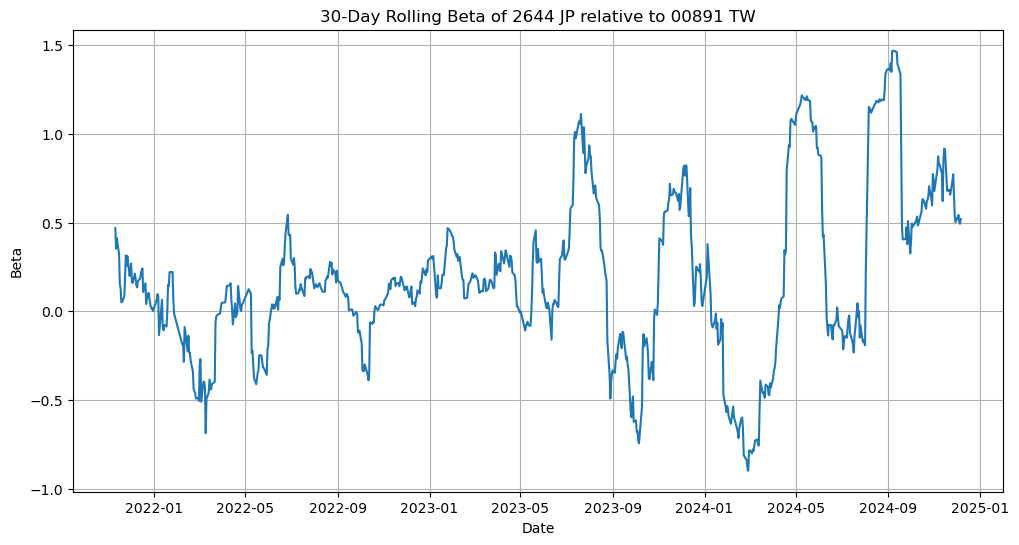

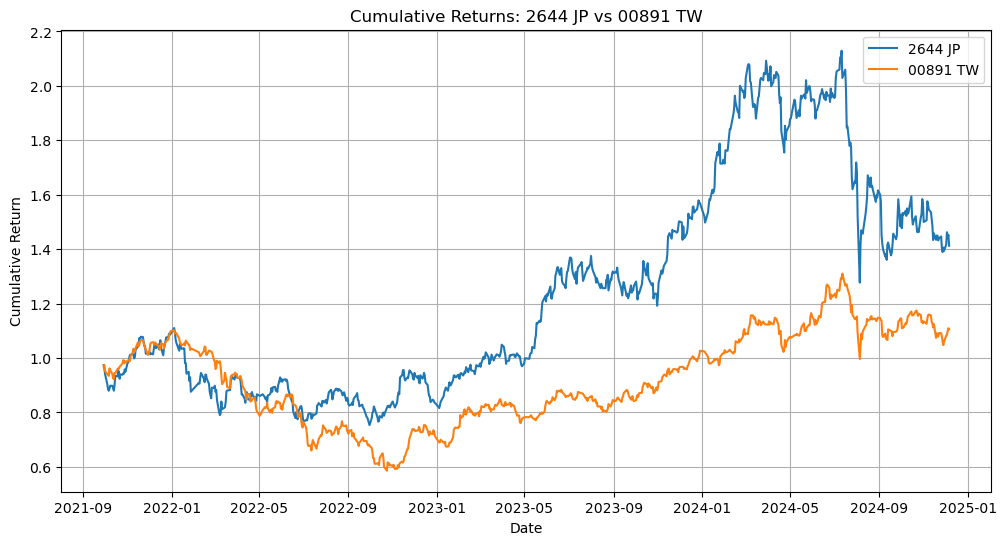

In [5]:
# Calculate beta using regression
X = sm.add_constant(returns['00891 TW'])
model = sm.OLS(returns['2644 JP'], X).fit()
print("\nRegression Results:")
print(model.summary())

# Calculate rolling correlation (30-day window)
rolling_corr = returns['2644 JP'].rolling(window=30).corr(returns['00891 TW'])

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr)
plt.title('30-Day Rolling Correlation between 2644 JP and 00891 TW')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Calculate rolling beta (30-day window)
def rolling_beta(x, y, window):
    ret = pd.DataFrame({'x': x, 'y': y})
    ret = ret.dropna()
    
    beta = pd.Series(index=ret.index)
    for i in range(window-1, len(ret)):
        slice_x = ret['x'].iloc[i-window+1:i+1]
        slice_y = ret['y'].iloc[i-window+1:i+1]
        beta.iloc[i] = np.cov(slice_x, slice_y)[0,1] / np.var(slice_x)
    
    return beta

rolling_beta_series = rolling_beta(returns['00891 TW'], returns['2644 JP'], 30)

# Plot rolling beta
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_series.index, rolling_beta_series)
plt.title('30-Day Rolling Beta of 2644 JP relative to 00891 TW')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns['2644 JP'], label='2644 JP')
plt.plot(cumulative_returns.index, cumulative_returns['00891 TW'], label='00891 TW')
plt.title('Cumulative Returns: 2644 JP vs 00891 TW')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()